In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px


In [8]:
train_df = pd.read_csv("/content/fraudTrain.csv")
test_df = pd.read_csv("/content/fraudTest.csv")
train_df.head()
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [9]:

test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [10]:

train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,11706.00000,1.170600e+04,11706.000000,11706.000000,11706.000000,11706.000000,1.170600e+04,1.170500e+04,11705.000000,11705.000000,11705.000000
mean,5852.50000,4.258380e+17,68.760918,49212.270203,38.562065,-90.540940,8.952011e+04,1.325688e+09,38.560738,-90.535437,0.004101
std,3379.37546,1.320777e+18,113.379429,27100.223974,5.173634,14.353408,3.001465e+05,1.873839e+05,5.199968,14.375129,0.063909
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,2926.25000,1.800462e+14,9.750000,26041.000000,34.743700,-97.060900,7.430000e+02,1.325511e+09,34.831130,-97.161258,0.000000
50%,5852.50000,3.521417e+15,48.495000,48438.000000,39.371600,-87.644300,2.408000e+03,1.325704e+09,39.360761,-87.632339,0.000000
75%,8778.75000,4.642255e+15,83.122500,72165.000000,41.846700,-80.158000,1.940800e+04,1.325863e+09,41.896736,-80.226861,0.000000
max,11705.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325969e+09,66.645176,-66.967742,1.000000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11706 entries, 0 to 11705
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11706 non-null  int64  
 1   trans_date_trans_time  11706 non-null  object 
 2   cc_num                 11706 non-null  int64  
 3   merchant               11706 non-null  object 
 4   category               11706 non-null  object 
 5   amt                    11706 non-null  float64
 6   first                  11706 non-null  object 
 7   last                   11706 non-null  object 
 8   gender                 11706 non-null  object 
 9   street                 11706 non-null  object 
 10  city                   11706 non-null  object 
 11  state                  11706 non-null  object 
 12  zip                    11706 non-null  int64  
 13  lat                    11706 non-null  float64
 14  long                   11706 non-null  float64
 15  ci

In [12]:
train_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [13]:
train_df.drop_duplicates(inplace=True)

In [14]:
train_df['amt'].describe()

count    11706.000000
mean        68.760918
std        113.379429
min          1.010000
25%          9.750000
50%         48.495000
75%         83.122500
max       3178.510000
Name: amt, dtype: float64

In [15]:
np.percentile(train_df['amt'], 99)

520.1235000000006

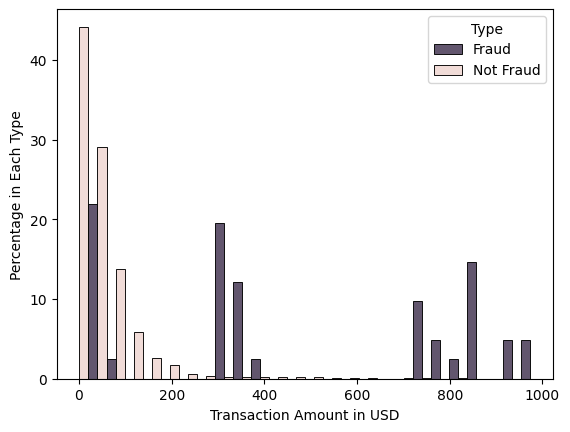

In [16]:
#amount vs fraud
ax=sns.histplot(x='amt',data=train_df[train_df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

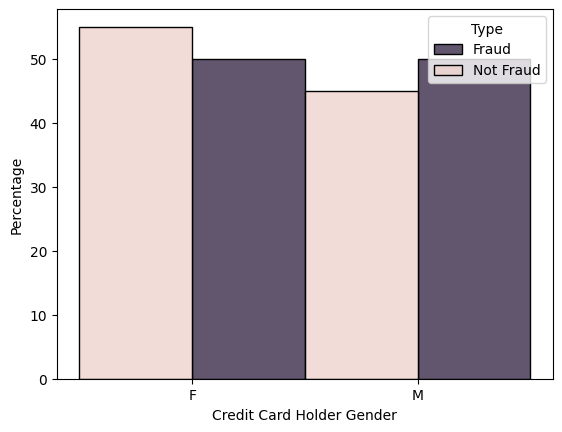

In [17]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=train_df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

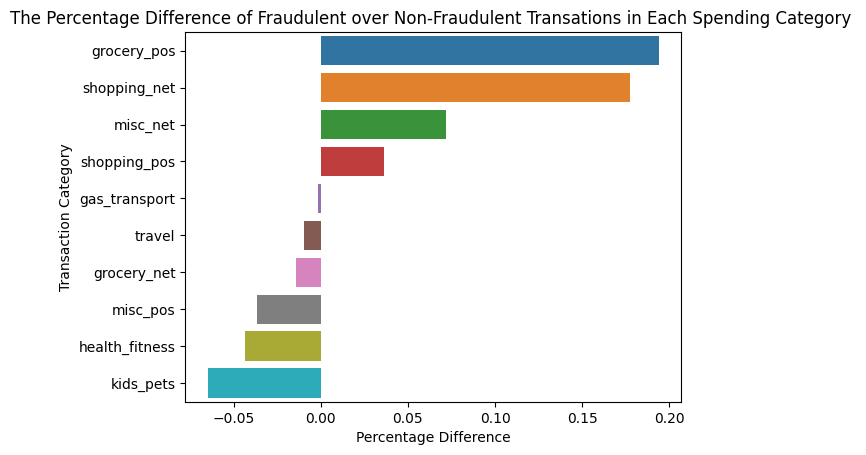

In [18]:
#calculate the percentage difference
a=train_df[train_df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train_df[train_df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

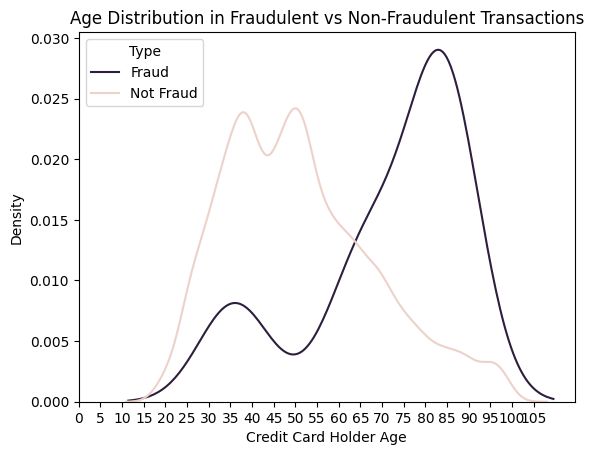

In [19]:
#age vs fraud
import datetime as dt
train_df['age']=dt.date.today().year-pd.to_datetime(train_df['dob']).dt.year
ax=sns.kdeplot(x='age',data=train_df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

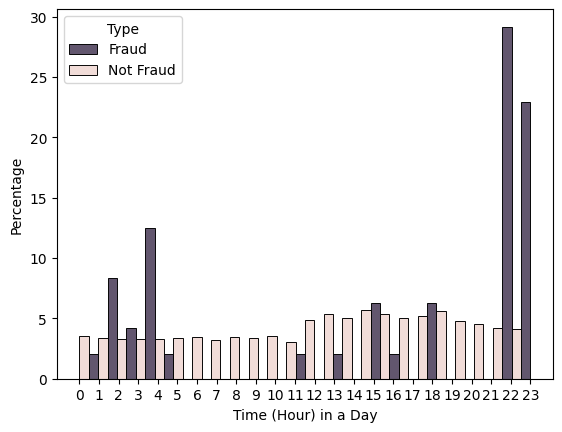

In [20]:
#time in a day vs fraud
train_df['hour']=pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=train_df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

<ipython-input-21-8e1677376c8a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


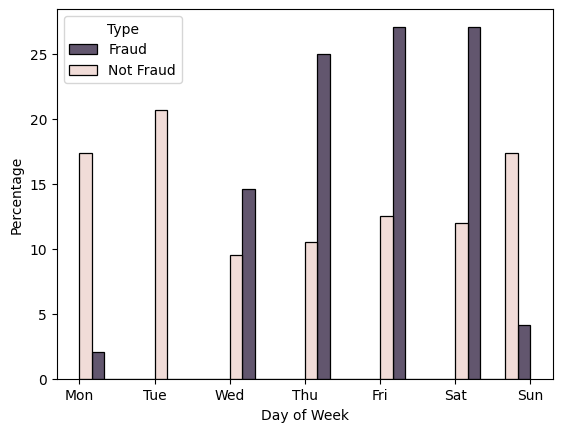

In [21]:
#day of week vs fraud
train_df['day']=pd.to_datetime(train_df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=train_df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])


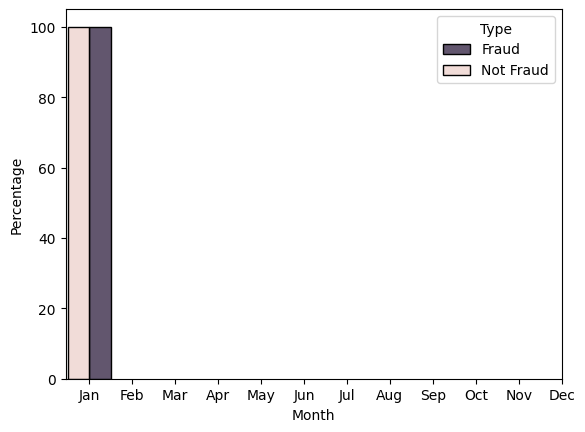

In [22]:
#month vs fraud
train_df['month']=pd.to_datetime(train_df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=train_df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])


Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

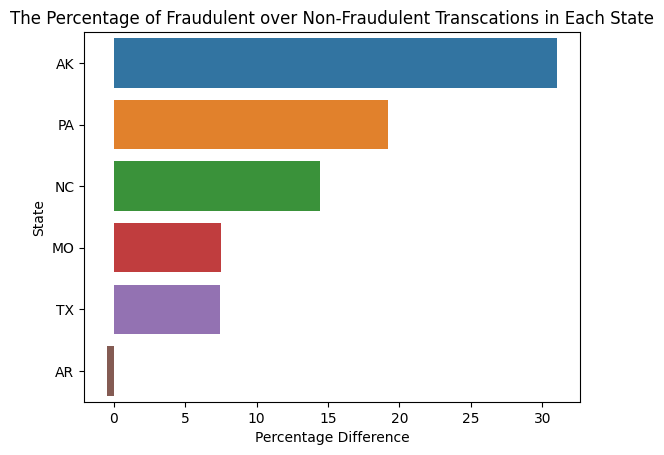

In [23]:

a=train_df['state'][train_df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=train_df['state'][train_df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

In [24]:
#subset the training data to include only the features that we need
train=train_df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

In [25]:
#let's do the same to the testing dataset
test_df = pd.read_csv("/content/fraudTest.csv")
test_df['age']=dt.date.today().year-pd.to_datetime(test_df['dob']).dt.year
test_df['hour']=pd.to_datetime(test_df['trans_date_trans_time']).dt.hour
test_df['day']=pd.to_datetime(test_df['trans_date_trans_time']).dt.dayofweek
test_df['month']=pd.to_datetime(test_df['trans_date_trans_time']).dt.month
test_df=test_df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
test_df=pd.get_dummies(test_df, drop_first=True)
y_test=test_df['is_fraud'].values
X_test=test_df.drop("is_fraud", axis='columns').values


In [26]:
import numpy as np

# Check for NaN values in y_train
nan_indices = np.isnan(y_train)

print(np.sum(nan_indices))


1


In [27]:
# Option 1: Remove samples with NaN in y_train
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

# Option 2: Fill NaN values with mean or median
# y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))


In [28]:
nan_indices = np.isnan(X_test)
print(np.sum(nan_indices))

2


In [29]:
# Option 1: Remove samples with NaN in X_test
X_test = X_test[~np.any(nan_indices, axis=1)]

# Option 2: Fill NaN values with mean or median
# X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))


In [30]:
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
#logistic regression


method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
lor_model=LogisticRegression()
lor_model.fit(X_resampled,y_resampled)
predicted=lor_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, predicted ))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

ValueError: Found input variables with inconsistent numbers of samples: [11697, 11696]

In [32]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=5)
rfc_model.fit(X_resampled,y_resampled)
predicted=rfc_model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

ValueError: Found input variables with inconsistent numbers of samples: [11697, 11696]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree Classifier
dtc_model = DecisionTreeClassifier(random_state=5)
dtc_model.fit(X_resampled, y_resampled)
# Make predictions
predicted = dtc_model.predict(X_test)
# Print classification report and confusion matrix
print('Decision Tree Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Decision Tree Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree Classifier
dtc_model = DecisionTreeClassifier(random_state=5)
dtc_model.fit(X_resampled, y_resampled)
# Make predictions
predicted = dtc_model.predict(X_test)
# Print classification report and confusion matrix
print('Decision Tree Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Decision Tree Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create and train the AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=5)
ada_model.fit(X_resampled, y_resampled)

# Make predictions
predicted = ada_model.predict(X_test)

# Print classification report and confusion matrix
print('AdaBoost Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('AdaBoost Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))